# Introducción a la Ciencia de Datos 2019-1
## Docente: Nelson Enrique Vera
### Estudiantes:
### Leidy Marcela Aldana Burgos  
- Código: 20151020019 - LeidyMarcelaAldana@gmail.com
### Andrés Mauricio Acosta Pulido 
- Código: 20142020111 - AndresAcostaPulido96@gmail.com

## Funciones: Table, Scatter Hist

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
dataset2=pd.read_csv('C_DIGO__NICO_DE_MEDICAMENTOS_VIGENTES0.csv')
dataset2=dataset2.truncate(before=90, after=190)
#dataset2.info()
#dataset2['tiporol'].unique()

In [10]:
x1=dataset2['cantidad']
x2=dataset2['fechavencimiento'].apply(lambda x:pd.to_datetime(x))
#min(x1)
type(x2)

N=len(x2)
colors = np.random.rand(N)
area = dataset2['cantidadcum']#(15* np.random.rand(N))**2  # 0 to 15 point radii

## Gráfica función Scatter
### Un diagrama de dispersión de y vs x con diferente tamaño de marcador y / o color.

#### https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter


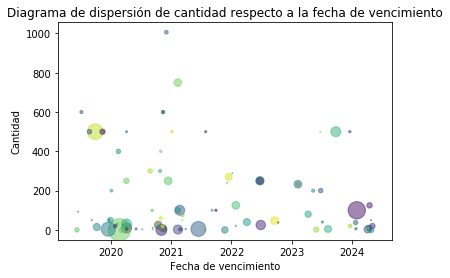

In [11]:
plt.scatter(x2, x1, s=area, c=colors, alpha=0.5)
plt.title('Diagrama de dispersión de cantidad respecto a la fecha de vencimiento')
plt.xlabel("Fecha de vencimiento")
plt.ylabel("Cantidad")
plt.show()

In [13]:
dataset1=pd.read_csv('Publicaciones_del_Instituto_Caro_y_Cuervo_actualizaci_n_2019.csv')
#dataset1.info()
#dataset1['EDITOR'].unique()

## Gráfica función Hist
### Histograma: Representación gráfica de una variable en forma de barras
#### https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist


Text(0, 0.5, 'Cantidad')

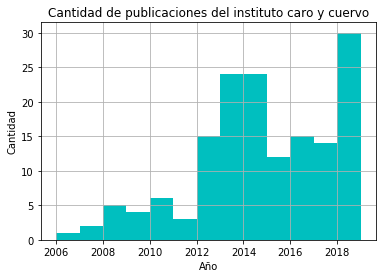

In [14]:
x3=dataset1['AÑO']
x3.hist(bins=(max(x3)-min(x3)),  facecolor='c')
plt.title('Cantidad de publicaciones del instituto caro y cuervo')
plt.xlabel("Año")
plt.ylabel("Cantidad")

In [32]:
x4=dataset2['fechavencimiento'].apply(lambda x:pd.to_datetime(x).year)
dataset2['fecha']=x4
x41=x4.unique()
x5=dataset2['tiporol'].unique()
x6=dataset2['tiporol']
#columns=x5
#columns[0]
#columns[1]
x41

array([2023, 2021, 2024, 2022, 2020, 2019])

In [70]:
data=[0,0]
data[0]=dataset2[dataset2['fecha']==2020].count()
#data[1]=dataset2[dataset2['tiporol']==x6[1]].count()["value"]
#len(dataset2[dataset2['fecha']==2024])

In [68]:
##### Colormap objects based on lookup tables using linear segments.
colors = plt.cm.BuPu(np.linspace(0, 0.9, len(x41)))

## Gráfica función Table
### Añadir una tabla a un eje.
#### https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.table.html#matplotlib.pyplot.table

[['6.0', '8.0'], ['7.0', '27.0'], ['3.0', '7.0'], ['5.0', '7.0'], ['7.0', '12.0'], ['3.0', '9.0']]


Text(0.5, 1.0, 'Medicamentos que provienen de un importador o de un fabricante')

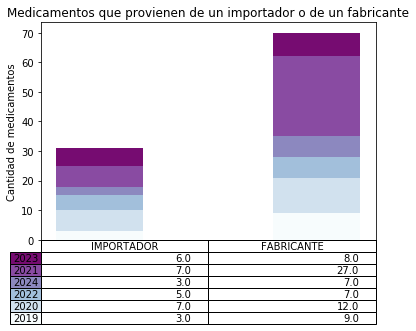

In [69]:
n_rows=len(x41)
index = np.arange(len(x5)) + 0.3
bar_width = 0.4
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(x5))
cell_text = []
data=[0,0]
# Reverse colors and text labels to display the last value at the top.
for row in range(n_rows):    
    data=[0,0]
    dfyear=dataset2[dataset2['fecha']==x41[row]]        
    data[0]=len(dfyear[dfyear['tiporol']==x5[0]])
    data[1]=len(dfyear[dfyear['tiporol']==x5[1]]) 
    #print(data)
    plt.bar(index, data, bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data
    cell_text.append(['%1.1f' % data[0], '%1.1f' % data[1]])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
print(cell_text)


# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=x41,
                      rowColours=colors,
                      colLabels=x5,
                      loc='bottom')

# Adjust layout to make room for the table:
#plt.subplots_adjust(left=0.2, bottom=0.2)
plt.xticks([])
plt.ylabel("Cantidad de medicamentos")
plt.title('Medicamentos que provienen de un importador o de un fabricante')